## Student Information
Name: Pohao-Henry Lin Huang

Student ID: 103032027

GitHub ID: [phlinhng](https://github.com/phlinhng)

---

## Table of Contents
### Part 1: Take Home Exercises
- Exercise 5
- Exercise 6
- Exercise 8
- Exercise 10
- Exercise 11
- Exercise 12
- Exercise 13
- Exercise 14
- Exercise 15

### Part 2: Operation with New Datasets
1. Data Prepartion & Transformation
2. Familiarizing with the Data
3. Data Processing
 - 3.1 Tokenize Texts
 - 3.2 Feature Subset Selection
 - 3.3 Dimensionality Reduction
 - 3.4 Atrribute Transformation / Aggregation

## Part 1: Take Home Exercises

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
import pandas as pd
# TA's functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [5]:
# add category to the dataframe
X['category'] = twenty_train.target

In [6]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### Exercise 5
Please check the data and the process below, describe what you observe and why it happened.

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer
Since `isnull()` only treats **na.nan and (blank)** as missing value. But id c,d,and e are **strings** with words **"NaN"** , **"None"** and **'\n'**, so `isnull()` sees them as values and returns false.

### Exercise 6
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
X_sample = X.sample(n=1000)

In [10]:
len(X_sample)

1000

In [11]:
len(X)

2257

In [12]:
X[-10:]

text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

#### Answer
Everything remain the same in X. Function `sample` only create a partial copy of X, so there is no overwrite couducted on the original dataset, X.

### Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

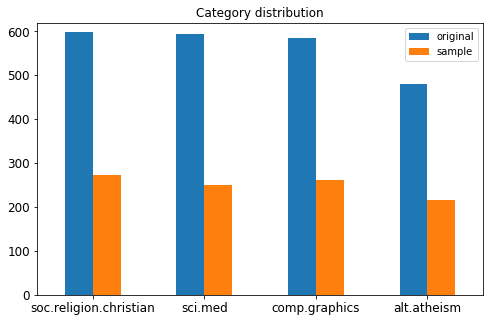

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

upper_bound = max(X.category_name.value_counts()) + 20

df = pd.concat([X['category_name'].value_counts(), X_sample['category_name'].value_counts()], axis=1, sort=False)
df.columns = ["original","sample"]
df.plot(kind="bar", title = 'Category distribution',
        ylim = [0, upper_bound], rot = 0,fontsize = 12, figsize=(8,5))
plt.legend(loc='upper right')

### Exercise 10

In [14]:
import nltk
import helpers.data_mining_helpers as dmh

In [15]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

Count_vect = CountVectorizer()
X_counts = Count_vect.fit_transform(X.text)

In [17]:
X1 = X_counts[0:5, 0:100].toarray()

#### Answer
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [59]:
for i in range(len(X1)):
    for j in range(len(X1[0])):
        if(X1[i,j] > 0): print ( Count_vect.get_feature_names()[i*len(X1[0])+j], "appears", X1[i,j], "times")                    

11705 appears 1 times
120352 appears 1 times


### Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

#### Answer
Since the whole datasets had a huge dimension, we had to apply sampling method to avoid long execution time and highly frequent crashings. A simple way is to randomly pick number for every n-th and m-th entires in docs and terms separtely. By adjusting n and m, we might finally reach some useful results.

In [19]:
sample1 = list(X.index)[::80]
sample2 = Count_vect.get_feature_names()[::72][0:30]
plot_x = ["doc_"+ str(i) for i in sample1]
plot_y = ["term_"+str(i) for i in sample2]
plot_z = X_counts[::80,::72][:,0:30].toarray()

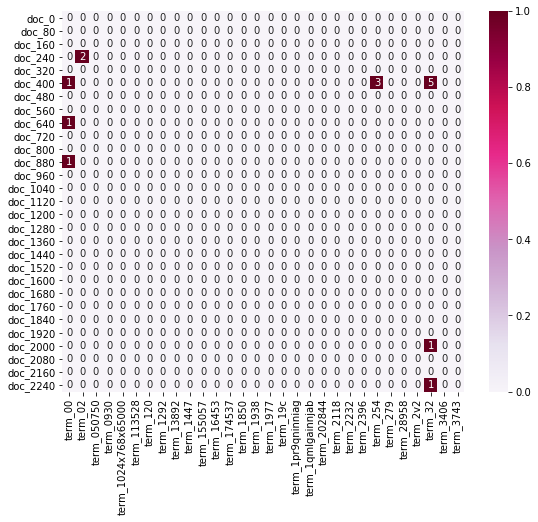

In [20]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_y, index = plot_x)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

In [21]:
from sklearn.decomposition import PCA

In [22]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

In [23]:
col = ['coral', 'blue', 'black', 'm']

# plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (100,100))
ax = plt.subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nY Label')

plt.show()

### Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above.

In [26]:
import helpers.text_analysis as ta
trace1 = ta.get_trace(X_reduced, X["category_name"], "alt.atheism", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced, X["category_name"], "soc.religion.christian", "rgb(52,133,252)")
trace3 = ta.get_trace(X_reduced, X["category_name"], "comp.graphics", "rgb(229,65,136)")
trace4 = ta.get_trace(X_reduced, X["category_name"], "sci.med", "rgb(99,151,68)")

In [25]:
data = [trace1, trace2, trace3, trace4]

In [27]:
import plotly.plotly as py
import plotly.graph_objs as go
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~phlinhng/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


### Exercise 14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [28]:
trace1 = ta.get_trace(X_reduced[::28], X["category_name"][::28], "alt.atheism", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced[::29], X["category_name"][::29], "soc.religion.christian", "rgb(52,133,252)")
trace3 = ta.get_trace(X_reduced[::30], X["category_name"][::30], "comp.graphics", "rgb(229,65,136)")
trace4 = ta.get_trace(X_reduced[::31], X["category_name"][::31], "sci.med", "rgb(99,151,68)")

In [29]:
data = [trace1, trace2, trace3, trace4]

In [30]:
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~phlinhng/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


### Exercise 15
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail][1] (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

[1]: https://en.wikipedia.org/wiki/Long_tail

In [66]:
Term_frequencies = []
for j in range(0,X_counts.shape[1]):
    Term_frequencies.append(sum(X_counts[:,j].toarray()))

Term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [68]:
S = []
S.append(Term_frequencies.tolist())
S.append(Count_vect.get_feature_names())

Term_frequencies_sorted = sorted(Term_frequencies.tolist(), 
                                 reverse = True)
Feature_names_sorted = [x for _,x in sorted(zip(s[0],s[1]), 
                                            reverse = True)]

In [69]:
Feature_names_sorted[:10]

['the', 'of', 'to', 'and', 'is', 'in', 'that', 'it', 'you', 'for']

In [ ]:
type(Feature_names_sorted)

## Part 2: Operation with New Datasets

### 1. Data Prepartion & Transformation

In [31]:
import pandas as pd
data1 = pd.read_csv("./sentiment labelled sentences/amazon_cells_labelled.txt", header=None , sep="	",
                  names=["text","score"])
data1["source_name"] = "amaz"
data2 = pd.read_csv("./sentiment labelled sentences/imdb_labelled.txt", header=None , sep="	",
                  names=["text","score"])
data2["source_name"] = "imdb"
data3 = pd.read_csv("./sentiment labelled sentences/yelp_labelled.txt", header=None , sep="	",
                  names=["text","score"])
data3["source_name"] = "yelp"
datas = [data1,data2,data3]
x = pd.concat(datas, ignore_index = True)

### 2. Familiarizing with the Data

In [32]:
x.loc[lambda f: f.source_name == 'amaz']['score'].value_counts()

1    500
0    500
Name: score, dtype: int64

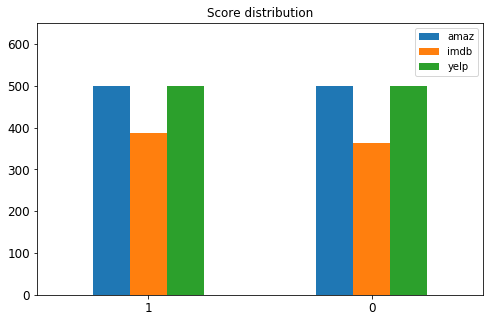

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

counts_amaz = x.loc[lambda f: f.source_name == 'amaz']['score'].value_counts()
counts_imdb = x.loc[lambda f: f.source_name == 'imdb']['score'].value_counts()
counts_yelp = x.loc[lambda f: f.source_name == 'yelp']['score'].value_counts()

counts_all = [counts_amaz, counts_imdb, counts_yelp]

upper_bound = max(pd.concat(counts_all)) + 150

df = pd.concat(counts_all, axis=1, sort=False)
df.columns = ["amaz","imdb","yelp"]
df.plot(kind="bar", title = 'Score distribution',
        ylim = [0, upper_bound], rot = 0,fontsize = 12, figsize=(8,5))
plt.legend(loc='upper right')

### 3. Data Processing

#### 3.1 Tokenize Texts

In [34]:
import nltk
import helpers.data_mining_helpers as dmh

In [35]:
# takes a like a minute or two to process
x['unigrams'] = x['text'].apply(lambda x: dmh.tokenize_text(x))

#### 3.2 Feature subset selection

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
count_vect = CountVectorizer()
x_counts = count_vect.fit_transform(x.text)

In [38]:
x_counts

<2748x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 30275 stored elements in Compressed Sparse Row format>

In [39]:
""" Since 'and' is a high frenquent word, this loop can find where 'and' is and help sampling."""
for i in range(0,500):
 if(count_vect.get_feature_names()[i] == 'and'): print(i)

216


In [40]:
sample1 = count_vect.get_feature_names()[::72][0:30]
sample2 = list(x.index)[::40]
plot_x = ["term_"+str(i) for i in sample1]
plot_y = ["line_"+ str(i) for i in sample2]
plot_z = x_counts[::40,::72][:,0:30].toarray()

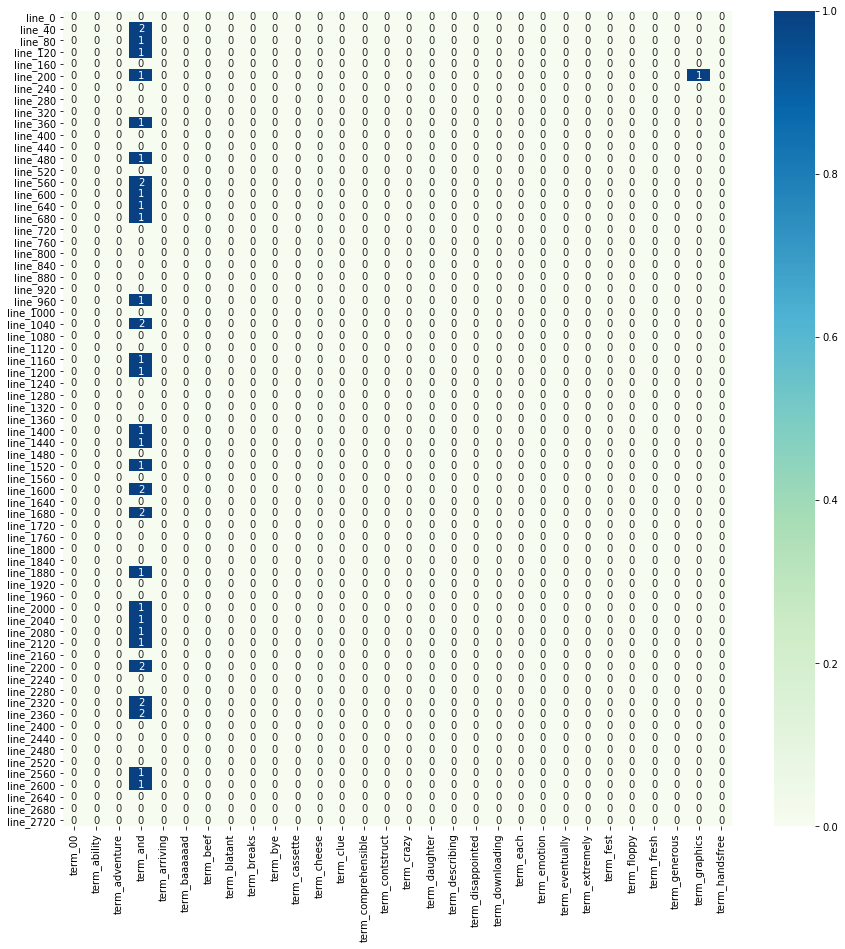

In [41]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df_todraw,
                 cmap="GnBu",
                 vmin=0, vmax=1, annot=True)

#### 3.3 Dimensionality Reduction

In [42]:
from sklearn.decomposition import PCA

In [43]:
x_reduced = PCA(n_components = 2).fit_transform(x_counts.toarray())

In [44]:
x_reduced.shape

(2748, 2)

In [45]:
source=["amaz","imdb","yelp"]

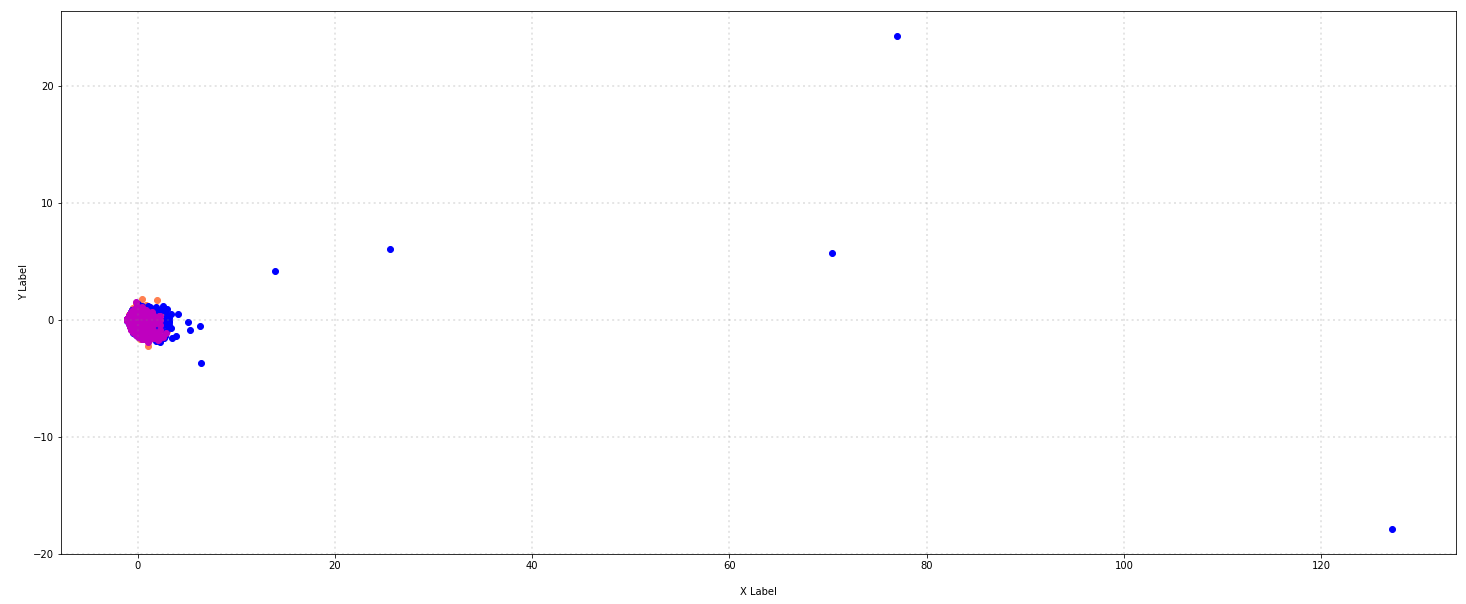

In [46]:
col = ['coral', 'blue', 'm' ]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, source):
    xs = x_reduced[x['source_name'] == category].T[0]
    ys = x_reduced[x['source_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

##### 3D version

In [47]:
x_reduced3 = PCA(n_components = 3).fit_transform(x_counts.toarray())

In [49]:
col = ['coral', 'blue', 'm']

# plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (100,100))
ax = plt.subplot(111, projection='3d')

for c, category in zip(col, source):
    xs = x_reduced3[x['source_name'] == category].T[0]
    ys = x_reduced3[x['source_name'] == category].T[1]
    zs = x_reduced3[x['source_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nY Label')

plt.show()

#### 3D version (using plotly, sampled)

In [50]:
trace1 = ta.get_trace(x_reduced3[::28], x["source_name"][::28], "amaz", "rgb(71,233,163)")
trace2 = ta.get_trace(x_reduced3[::29], x["source_name"][::29], "imdb", "rgb(52,133,252)")
trace3 = ta.get_trace(x_reduced3[::30], x["source_name"][::30], "yelp", "rgb(229,65,136)")

In [51]:
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~phlinhng/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


#### 3.4 Atrribute Transformation / Aggregation

In [52]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(x_counts[:,j].toarray()))

In [53]:
term_frequencies = np.asarray(Xxcounts.sum(axis=0))[0]

In [55]:
term_frequencies[216]

2

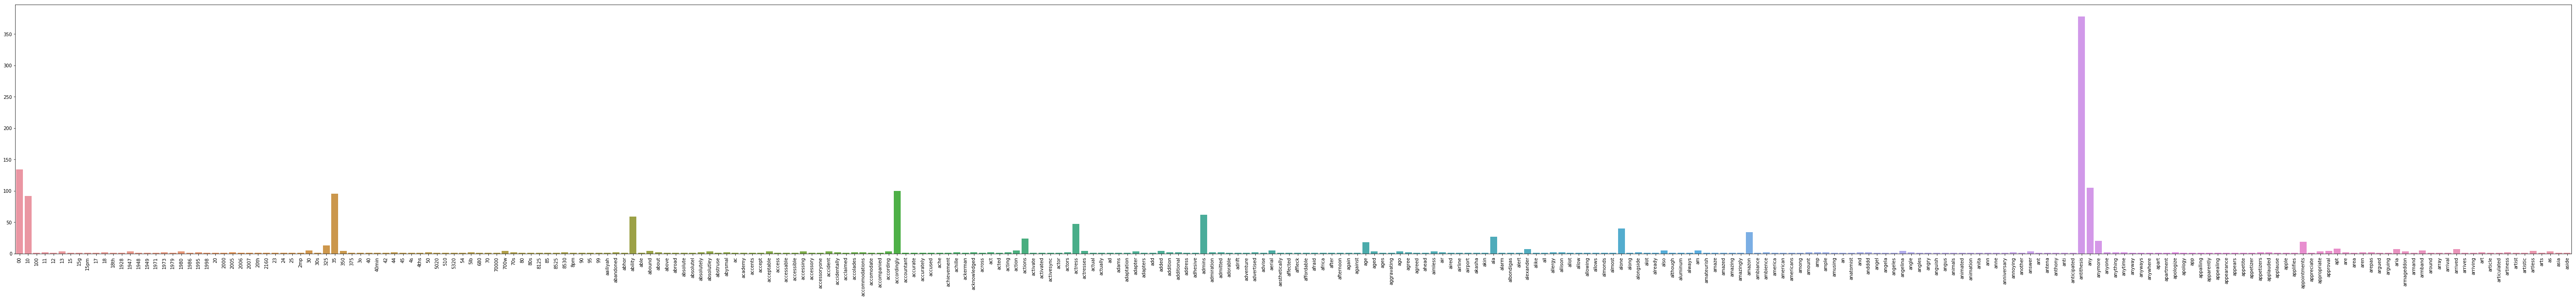

In [56]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [ ]:
s = []
s.append(term_frequencies.tolist())
s.append(count_vect.get_feature_names())

term_frequencies_sorted = sorted(term_frequencies.tolist(), 
                                 reverse = True)
feature_names_sorted = [x for _,x in sorted(zip(s[0],s[1]), 
                                            reverse = True)]